# Tables creation

### Import libraries

In [1]:
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Data path and DB connection

In [4]:
DATA_PATH = '../data/technical_debt/'

In [5]:
conn = sqlite3.connect(DATA_PATH + 'technicalDebtDataset.db')

### Fetch main tables

In [6]:
query = ''' SELECT
                gc.projectID, gc.commitHash, gc.commitMessage,
                sm.complexity, sm.lines, sm.commentLines, sm.duplicatedLines,
                sm.violations, sm.blockerViolations, sm.criticalViolations, sm.majorViolations, sm.minorViolations,
                sm.bugs, sm.codeSmells 
            FROM
                GIT_COMMITS as gc
            INNER JOIN
                SONAR_MEASURES as sm
            WHERE
                gc.commitHash = sm.commitHash
'''

In [7]:
df = pd.read_sql_query(query, conn)
df.head()

,projectID,commitHash,commitMessage,complexity,lines,commentLines,duplicatedLines,violations,blockerViolations,criticalViolations,majorViolations,minorViolations,bugs,codeSmells
0,accumulo,e0880e263e4bf8662ba3848405200473a25dfc9f,ACCUMULO-1 initial checkin of source code\n\ng...,43137,263680,13509,46445,18314,142,893,7310,9889,464,17012
1,accumulo,e8774c5ec3a35e042f320540b5f7e66ebd2d9e87,"ACCUMULO-2 moved cloudtrace for TRUNK, fixed p...",43137,262753,13507,46301,18169,142,893,7164,9890,344,16987
2,accumulo,2032ebbd0ed90734da39ca238bbd10dee24d0030,ACCUMULO-2 fixed thrift build script to point ...,43137,262753,13507,46301,18169,142,893,7164,9890,344,16987
3,accumulo,de297d4932e08625a5df146f0802041bb5aeb892,ACCUMULO-2 reverted change to config.html\n\ng...,43137,263643,13507,46445,18315,142,893,7310,9890,464,17013
4,accumulo,34efaae87639a83b60fdb7274de4b45051025a3a,ACCUMULO-2 fixed cloudtrace references in cont...,43137,263639,13507,46445,18315,142,893,7310,9890,464,17013


### Convert some columns to numeric

In [8]:
cols = [i for i in df.columns if i not in ['projectID','commitHash','commitMessage']]
for col in cols:
    df[col] = df[col].astype(int)

In [9]:
df.dtypes

projectID             object
commitHash            object
commitMessage         object
complexity             int64
lines                  int64
commentLines           int64
duplicatedLines        int64
violations             int64
blockerViolations      int64
criticalViolations     int64
majorViolations        int64
minorViolations        int64
bugs                   int64
codeSmells             int64
dtype: object

### Columns metrics

In [10]:
df.describe()

,complexity,lines,commentLines,duplicatedLines,violations,blockerViolations,criticalViolations,majorViolations,minorViolations,bugs,codeSmells
count,55629.000000,5.562900e+04,55629.000000,55629.000000,55629.000000,55629.000000,55629.000000,55629.000000,55629.000000,55629.000000,55629.000000
mean,12112.140179,1.327941e+05,17577.502921,15517.791602,5440.302198,27.425030,373.338097,2375.444157,2563.342861,74.626670,5235.007442
std,15175.782233,1.515171e+05,18922.274369,24901.111445,6642.833830,53.010832,355.199801,2700.680993,3778.729807,113.049746,6368.548284
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2522.000000,2.941900e+04,4205.000000,2048.000000,1197.000000,2.000000,85.000000,498.000000,397.000000,6.000000,1168.000000
50%,5302.000000,6.624600e+04,10221.000000,6113.000000,2291.000000,8.000000,240.000000,1050.000000,899.000000,19.000000,2163.000000
75%,14080.000000,1.663610e+05,22674.000000,19504.000000,9358.000000,38.000000,626.000000,3188.000000,4050.000000,112.000000,9018.000000
max,139214.000000,1.175349e+06,125220.000000,264993.000000,48093.000000,419.000000,1305.000000,24772.000000,21509.000000,1505.000000,45538.000000


### Preprocessing on "violations" types

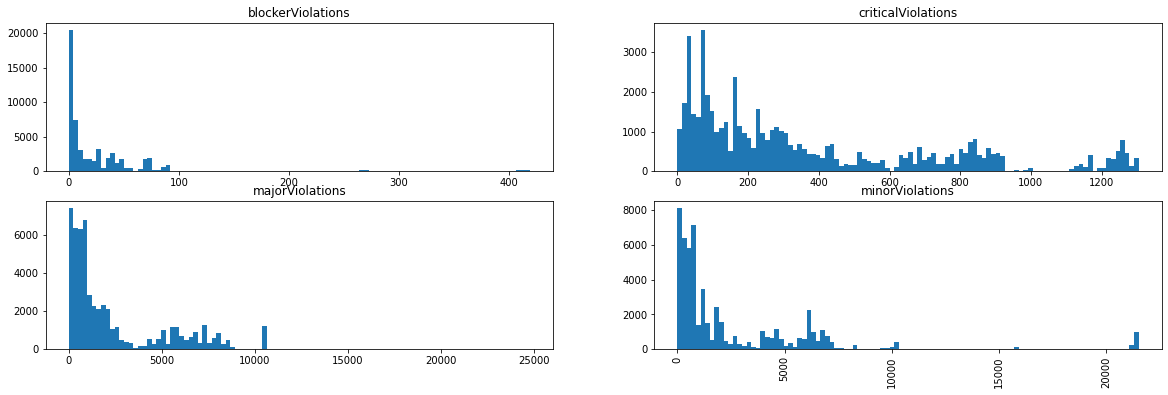

In [11]:
fig , ax = plt.subplots(2,2, figsize=(20,6))
ax[0,0].hist(df['blockerViolations'], bins=100)
ax[0,1].hist(df['criticalViolations'], bins=100)
ax[1,0].hist(df['majorViolations'], bins=100)
ax[1,1].hist(df['minorViolations'], bins=100)

ax[0,0].title.set_text('blockerViolations')
ax[0,1].title.set_text('criticalViolations')
ax[1,0].title.set_text('majorViolations')
ax[1,1].title.set_text('minorViolations')
plt.xticks(rotation='vertical')
plt.show()

Cut violations only where there is data.

In [12]:
df['blockerViolations'] = df['blockerViolations'].where(df['blockerViolations'] <= 100, 100)
df['majorViolations'] = df['majorViolations'].where(df['majorViolations'] <= 10000, 10000)
df['minorViolations'] = df['minorViolations'].where(df['minorViolations'] <= 10000, 10000)

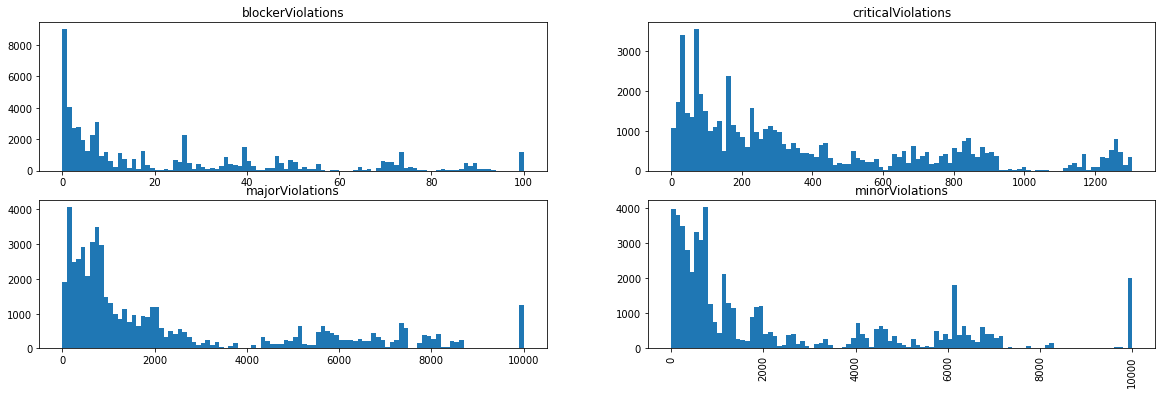

In [13]:
fig , ax = plt.subplots(2,2, figsize=(20,6))
ax[0,0].hist(df['blockerViolations'], bins=100)
ax[0,1].hist(df['criticalViolations'], bins=100)
ax[1,0].hist(df['majorViolations'], bins=100)
ax[1,1].hist(df['minorViolations'], bins=100)

ax[0,0].title.set_text('blockerViolations')
ax[0,1].title.set_text('criticalViolations')
ax[1,0].title.set_text('majorViolations')
ax[1,1].title.set_text('minorViolations')
plt.xticks(rotation='vertical')
plt.show()

We merge minor and major violations into one, by adding them up.

In [14]:
df = df.assign(mamiViolations = df['minorViolations'] + df['majorViolations'])

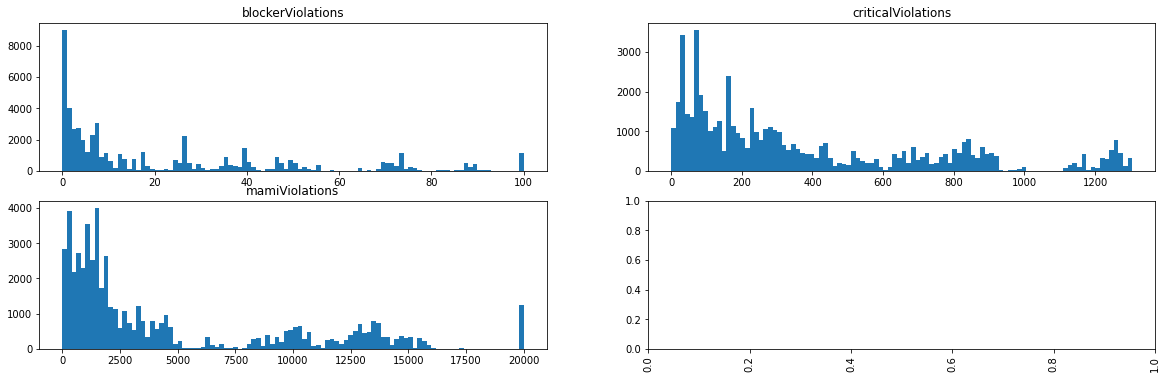

In [15]:
fig , ax = plt.subplots(2,2, figsize=(20,6))
ax[0,0].hist(df['blockerViolations'], bins=100)
ax[0,1].hist(df['criticalViolations'], bins=100)
ax[1,0].hist(df['mamiViolations'], bins=100)

ax[0,0].title.set_text('blockerViolations')
ax[0,1].title.set_text('criticalViolations')
ax[1,0].title.set_text('mamiViolations')
plt.xticks(rotation='vertical')
plt.show()

Create bins for 4 different groups.

In [16]:
N_BINS = 3
bins_blocker = np.arange(min(df.blockerViolations), max(df.blockerViolations)+1, step = max(df.blockerViolations)//N_BINS)
bins_blocker[-1] += 1
bins_blocker[0] = -1
bins_blocker

array([ -1,  33,  66, 100])

In [17]:
bins_critical = np.arange(min(df.criticalViolations), max(df.criticalViolations)+1, step = max(df.criticalViolations)//N_BINS)
bins_critical[-1] += 1
bins_critical[0] = -1
bins_critical

array([  -1,  435,  870, 1306])

In [18]:
bins_mami = np.arange(min(df.mamiViolations), max(df.mamiViolations)+1, step = max(df.mamiViolations)//N_BINS)
bins_mami[-1] += 1
bins_mami[0] = -1
bins_mami

array([   -1,  6666, 13332, 19999])

Create interval variables for each violation.

In [19]:
df['bin_blockerViolations'] = pd.cut(df['blockerViolations'], bins_blocker)
df['bin_criticalViolations'] = pd.cut(df['criticalViolations'], bins_critical)
df['bin_mamiViolations'] = pd.cut(df['mamiViolations'], bins_mami)

Codify them into different integers.

In [20]:
df['class_blockerViolations'] = df['bin_blockerViolations'].cat.codes.astype(str)
df['class_criticalViolations'] = df['bin_criticalViolations'].cat.codes.astype(str)
df['class_mamiViolations'] = df['bin_mamiViolations'].cat.codes.astype(str)

Merge them all and create a colum paste of all combination of classes.

In [21]:
df["class"] = df["class_blockerViolations"] + df["class_criticalViolations"] + df["class_mamiViolations"]
df['class']

0        222
1        222
2        222
3        222
4        222
        ... 
55624    010
55625    010
55626    010
55627    010
55628    010
Name: class, Length: 55629, dtype: object

Assign a category to each combination of class.

In [22]:
df['class'] = df['class'].astype('category')
df['category'] = df['class'].cat.codes
df[['class','category']]

,class,category
0,222,21
1,222,21
2,222,21
3,222,21
4,222,21
...,...,...
55624,010,3
55625,010,3
55626,010,3
55627,010,3


We get the combination categories below.

In [23]:
df.category.unique()

array([21, 17, 18, 20,  0,  4, 19, 15, 14,  1,  9, 10,  5, 12, 13,  8,  7,
       11, 16,  3,  6,  2], dtype=int8)

Check if there are NA categories.

In [24]:
df[df.category.isna()]

,projectID,commitHash,commitMessage,complexity,lines,commentLines,duplicatedLines,violations,blockerViolations,criticalViolations,...,codeSmells,mamiViolations,bin_blockerViolations,bin_criticalViolations,bin_mamiViolations,class_blockerViolations,class_criticalViolations,class_mamiViolations,class,category


We create a lookup table of the data created (in order to check which intervals where chosen, if needed)

In [25]:
viols = ['bin_blockerViolations','bin_criticalViolations','bin_mamiViolations']
categories = pd.DataFrame()
for v in viols:
    t = pd.DataFrame({'interval': df[v].unique()})
    t['type'] = v
    t['class'] = np.arange(0,len(df[v].unique()))
    categories = pd.concat([categories,t])
categories.reset_index(drop=True)

ValueError: Cannot convert non-finite values (NA or inf) to integer

### Resulting table

In [26]:
df

,projectID,commitHash,commitMessage,complexity,lines,commentLines,duplicatedLines,violations,blockerViolations,criticalViolations,...,codeSmells,mamiViolations,bin_blockerViolations,bin_criticalViolations,bin_mamiViolations,class_blockerViolations,class_criticalViolations,class_mamiViolations,class,category
0,accumulo,e0880e263e4bf8662ba3848405200473a25dfc9f,ACCUMULO-1 initial checkin of source code\n\ng...,43137,263680,13509,46445,18314,100,893,...,17012,17199,"(66, 100]","(870, 1306]","(13332, 19999]",2,2,2,222,21
1,accumulo,e8774c5ec3a35e042f320540b5f7e66ebd2d9e87,"ACCUMULO-2 moved cloudtrace for TRUNK, fixed p...",43137,262753,13507,46301,18169,100,893,...,16987,17054,"(66, 100]","(870, 1306]","(13332, 19999]",2,2,2,222,21
2,accumulo,2032ebbd0ed90734da39ca238bbd10dee24d0030,ACCUMULO-2 fixed thrift build script to point ...,43137,262753,13507,46301,18169,100,893,...,16987,17054,"(66, 100]","(870, 1306]","(13332, 19999]",2,2,2,222,21
3,accumulo,de297d4932e08625a5df146f0802041bb5aeb892,ACCUMULO-2 reverted change to config.html\n\ng...,43137,263643,13507,46445,18315,100,893,...,17013,17200,"(66, 100]","(870, 1306]","(13332, 19999]",2,2,2,222,21
4,accumulo,34efaae87639a83b60fdb7274de4b45051025a3a,ACCUMULO-2 fixed cloudtrace references in cont...,43137,263639,13507,46445,18315,100,893,...,17013,17200,"(66, 100]","(870, 1306]","(13332, 19999]",2,2,2,222,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55624,zookeeper,cd0e323831c8b4cde64976325bfc79bb53cdd9b7,ZOOKEEPER-2635: Regenerate documentation (fpj),10111,103678,10708,5142,4981,18,534,...,4471,4352,"(-1, 33]","(435, 870]","(-1, 6666]",0,1,0,010,3
55625,zookeeper,482ce218d815b7a613ed9728b82602ddecc61996,ZOOKEEPER-761: Remove *synchronous* calls from...,10111,103678,10708,5142,4981,18,534,...,4471,4352,"(-1, 33]","(435, 870]","(-1, 6666]",0,1,0,010,3
55626,zookeeper,dfcf4da75c35c12d08496ded2612031f887c0765,ZOOKEEPER-2647: Fix TestReconfigServer.cc\n\nA...,10111,103678,10708,5142,4981,18,534,...,4471,4352,"(-1, 33]","(435, 870]","(-1, 6666]",0,1,0,010,3
55627,zookeeper,8616a9ec8ce4bc8ac2987b7417a6f0c4b7333658,ZOOKEEPER-2479: Add 'electionTimeTaken' value ...,10118,103746,10715,5142,4981,18,534,...,4471,4352,"(-1, 33]","(435, 870]","(-1, 6666]",0,1,0,010,3


In [47]:
df['category'].value_counts(), df['category'].count(), 

(0     34025
 9      3619
 13     2343
 7      2243
 17     2223
 3      2164
 21     1664
 1      1653
 4      1250
 16     1127
 19     1079
 6       639
 10      528
 14      525
 20      279
 11      174
 2        57
 8        18
 12       15
 15        2
 18        1
 5         1
 Name: category, dtype: int64,
 55629)

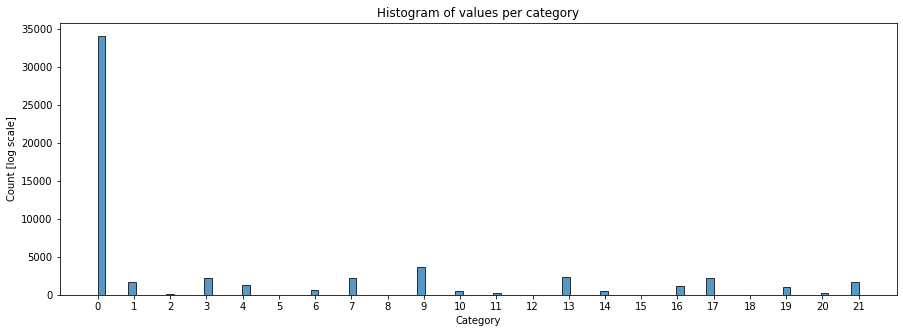

In [46]:
import seaborn as sns
fig , ax = plt.subplots(1,1, figsize=(15,5))
sns.histplot(df['category'], bins=100, ax =ax)
ax.set_xticks(df.category.unique())
ax.set_xlabel("Category")
ax.set_ylabel("Count [log scale]")
ax.set_title('Histogram of values per category')
#ax.set_yscale('log')
plt.show()

### Save table data

Save it as pickle.

In [25]:
SAVE_PATH = '../data/our_data/'

In [26]:
filename = 'commits_violations.pkl'

df.to_pickle(SAVE_PATH + filename)

We can read it by using:

In [27]:
df = pd.read_pickle(SAVE_PATH + filename)
df.head()

,projectID,commitHash,commitMessage,complexity,lines,commentLines,duplicatedLines,violations,blockerViolations,criticalViolations,...,codeSmells,mamiViolations,bin_blockerViolations,bin_criticalViolations,bin_mamiViolations,class_blockerViolations,class_criticalViolations,class_mamiViolations,class,category
0,accumulo,e0880e263e4bf8662ba3848405200473a25dfc9f,ACCUMULO-1 initial checkin of source code\n\ng...,43137,263680,13509,46445,18314,100,893,...,17012,17199,"(66, 100]","(870, 1306]","(13332, 19999]",2,2,2,222,21
1,accumulo,e8774c5ec3a35e042f320540b5f7e66ebd2d9e87,"ACCUMULO-2 moved cloudtrace for TRUNK, fixed p...",43137,262753,13507,46301,18169,100,893,...,16987,17054,"(66, 100]","(870, 1306]","(13332, 19999]",2,2,2,222,21
2,accumulo,2032ebbd0ed90734da39ca238bbd10dee24d0030,ACCUMULO-2 fixed thrift build script to point ...,43137,262753,13507,46301,18169,100,893,...,16987,17054,"(66, 100]","(870, 1306]","(13332, 19999]",2,2,2,222,21
3,accumulo,de297d4932e08625a5df146f0802041bb5aeb892,ACCUMULO-2 reverted change to config.html\n\ng...,43137,263643,13507,46445,18315,100,893,...,17013,17200,"(66, 100]","(870, 1306]","(13332, 19999]",2,2,2,222,21
4,accumulo,34efaae87639a83b60fdb7274de4b45051025a3a,ACCUMULO-2 fixed cloudtrace references in cont...,43137,263639,13507,46445,18315,100,893,...,17013,17200,"(66, 100]","(870, 1306]","(13332, 19999]",2,2,2,222,21


In [51]:
dff = df[['complexity', 'lines', 'commentLines', 'duplicatedLines', 'violations','category']]

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

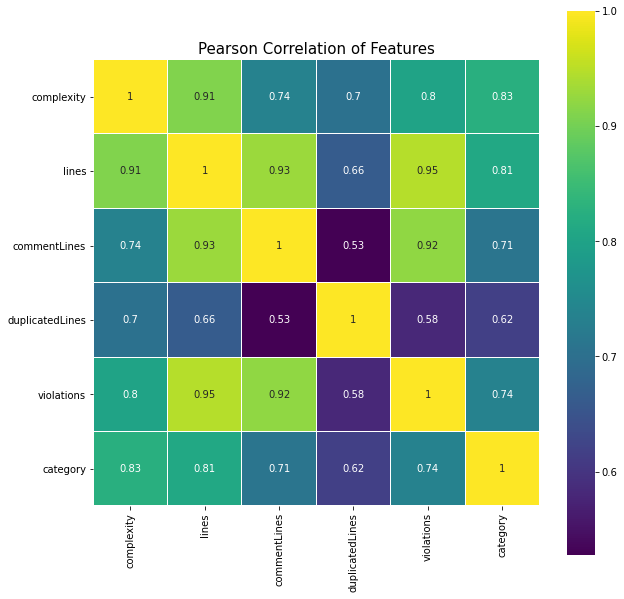

In [53]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', size=15)

sns.heatmap(dff.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [55]:
dff.isna().sum()

complexity         0
lines              0
commentLines       0
duplicatedLines    0
violations         0
category           0
dtype: int64

In [60]:
import sys

!{sys.executable} -m pip install 'sklearn'
!{sys.executable} -m pip install 'xgboost'

     |████████████████████████████████| 1.2 MB 678 kB/s eta 0:00:01


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
y = dff['category']
X = dff.drop(['violations', 'category'], axis=1)
RS = 123

# Split dataframe into training and test/validation set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RS)

In [71]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis()]#,
    #QuadraticDiscriminantAnalysis()]

In [72]:
# Logging for Visual Comparison
#log_cols=["Classifier", "Accuracy", "Log Loss"]
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    #train_predictions = clf.predict_proba(X_test)
    #ll = log_loss(y_test, train_predictions)
    #print("Log Loss: {}".format(ll))
    
    #log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log_entry = pd.DataFrame([[name, acc*100]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)


KNeighborsClassifier
****Results****
Accuracy: 99.8652%
SVC
****Results****
Accuracy: 77.8627%
DecisionTreeClassifier
****Results****
Accuracy: 99.8472%
RandomForestClassifier
****Results****
Accuracy: 99.8921%
XGBClassifier
****Results****
Accuracy: 99.8742%
AdaBoostClassifier
****Results****
Accuracy: 68.8298%
GradientBoostingClassifier
****Results****
Accuracy: 99.5686%
GaussianNB
****Results****
Accuracy: 80.9995%
LinearDiscriminantAnalysis
****Results****
Accuracy: 75.2831%


In [73]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,99.865181
0,SVC,77.862664
0,DecisionTreeClassifier,99.847205
0,RandomForestClassifier,99.892145
0,XGBClassifier,99.874169
0,AdaBoostClassifier,68.829768
0,GradientBoostingClassifier,99.568578
0,GaussianNB,80.999461
0,LinearDiscriminantAnalysis,75.283121


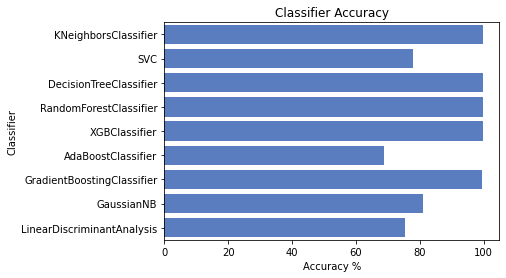

In [74]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

#sns.set_color_codes("muted")
#sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

#plt.xlabel('Log Loss')
#plt.title('Classifier Log Loss')
#plt.show()

In [75]:
# Inspect the learned Decision Trees
# One of the major advantage of Decision Trees is the fact that they can easily be interpreted.  
clf = DecisionTreeClassifier()

# Fit with all the training set
clf.fit(X, y)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%s : (%f)" % (feature_names[f] , importances[indices[f]]))

Feature ranking:
complexity : (0.383154)
lines : (0.268654)
commentLines : (0.197057)
duplicatedLines : (0.151135)


Text(0.5, 0, 'Index of the feature')

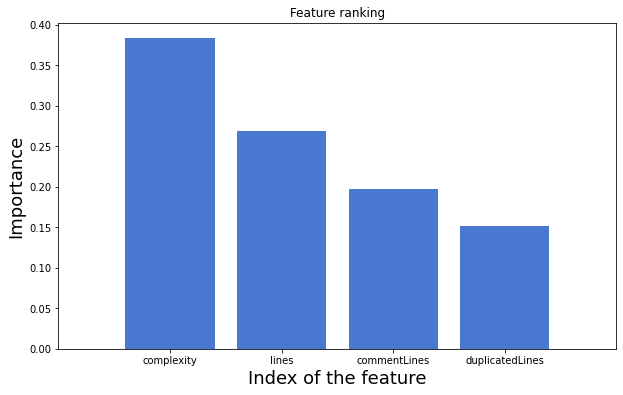

In [81]:
f, ax = plt.subplots(figsize=(10, 6))
plt.title("Feature ranking", fontsize = 12)
plt.bar(range(X.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), feature_names)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importance", fontsize = 18)
plt.xlabel("Index of the feature", fontsize = 18)